In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
coffee_full = pd.read_csv('Datasets/coffee_dataset.csv')
coffee_red = coffee_full.sample(200)
coffee_red.head(5)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


1. What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

In [3]:
coffee_red['drinks_coffee'].mean() # Drinks Coffee

0.595

In [4]:
1 - coffee_red['drinks_coffee'].mean() # Don't Drink Coffee

0.405

2. Of the individuals who do not drink coffee, what is the average height ?

In [5]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

3. Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [6]:
bootsamp = coffee_red.sample(200, replace=True)

In [7]:
bootsamp['drinks_coffee'].mean()

0.605

4. Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

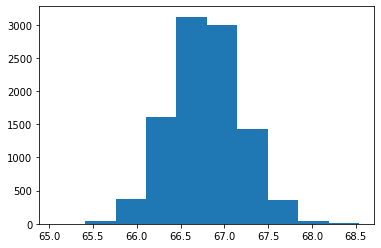

In [9]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)

plt.hist(boot_means);    

In [10]:
np.percentile(boot_means,2.5), np.percentile(boot_means, 97.5)

(66.00553304554545, 67.5973045839486)


5. Did your interval capture the actual average height of coffee drinkers in the population? Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [11]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.44340776214705

#### Captured by our interval, but not the exact same as the sample mean